In [1]:
# Required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

from augment.geometric import crop, rotate, scale, shear, translate
from augment.photometric import brightness_contrast, colorSpace, addNoise
from augment.kernel_based import blur, randomErase, randomCropAdd, sharpen

#### Geometric Augmentation examples ####

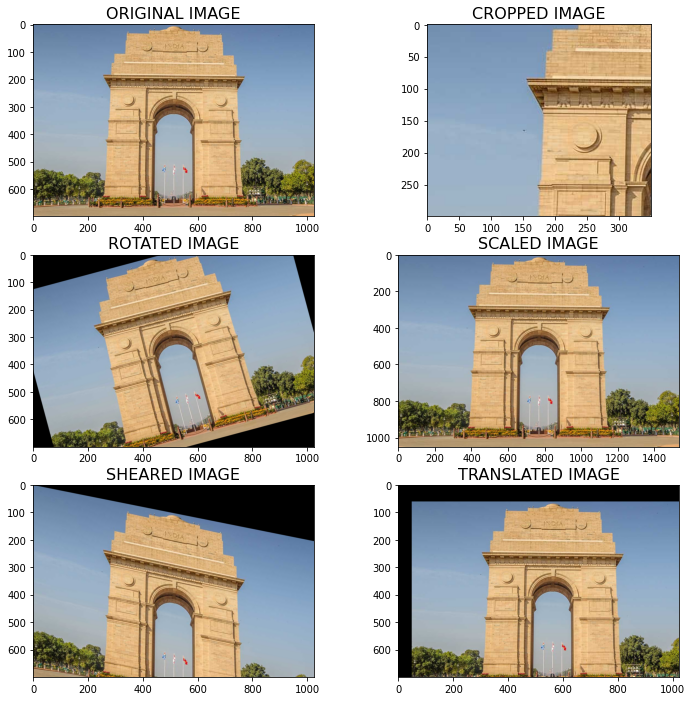

In [2]:
img = cv2.imread('images/3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(3,2,1)
ax.set_title('ORIGINAL IMAGE', fontsize=16)
ax.imshow(img)

img_new = crop(img, point1 = (100, 100), point2 = (450, 400))
ax = fig.add_subplot(3,2,2)
ax.set_title('CROPPED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new = rotate(img, angle = 15, keep_resolution = True)
ax = fig.add_subplot(3,2,3)
ax.set_title('ROTATED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new = scale(img, fx = 1.5, fy = 1.5, keep_resolution = False)
ax = fig.add_subplot(3,2,4)
ax.set_title('SCALED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new = shear(img, shear_val = 0.2, axis = 1)
ax = fig.add_subplot(3,2,5)
ax.set_title('SHEARED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new = translate(img, tx = 50, ty = 60)
ax = fig.add_subplot(3,2,6)
ax.set_title('TRANSLATED IMAGE', fontsize=16)
ax.imshow(img_new)

#### Geometric Augmentation with bounding box examples ####

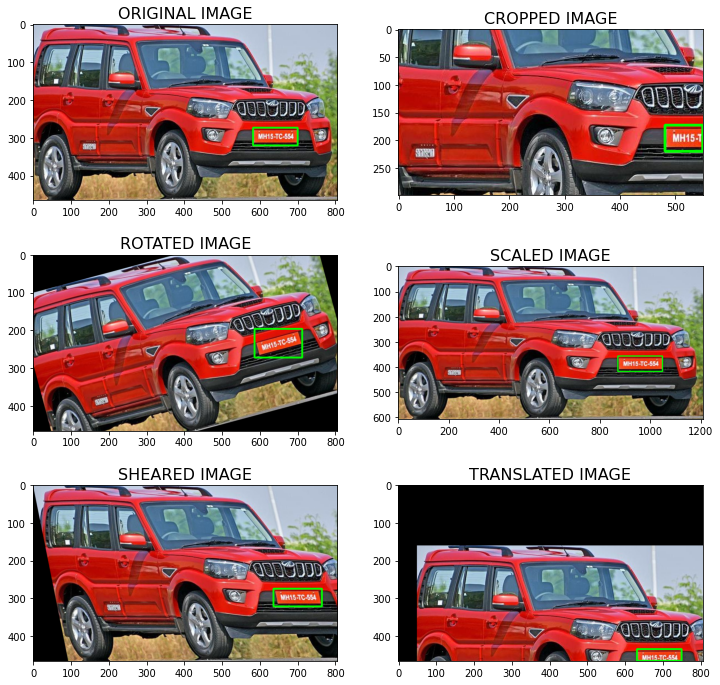

In [3]:
img = cv2.imread('images/0.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(12,12))
bbox = [581, 274, 699, 321]

img_new = img.copy()
cv2.rectangle(img_new, (int(bbox[0]),int(bbox[1])), (int(bbox[2]),int(bbox[3])), (0,255,0), 3)
ax = fig.add_subplot(3,2,1)
ax.set_title('ORIGINAL IMAGE', fontsize=16)
ax.imshow(img_new)

img_new, bbox_new = crop(img, point1 = (100, 100), point2 = (650, 400), box = bbox)
cv2.rectangle(img_new, (int(bbox_new[0]),int(bbox_new[1])), (int(bbox_new[2]),int(bbox_new[3])), (0,255,0), 3)
ax = fig.add_subplot(3,2,2)
ax.set_title('CROPPED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new, bbox_new = rotate(img, angle = 15, keep_resolution = True, box = bbox)
cv2.rectangle(img_new, (int(bbox_new[0]),int(bbox_new[1])), (int(bbox_new[2]),int(bbox_new[3])), (0,255,0), 3)
ax = fig.add_subplot(3,2,3)
ax.set_title('ROTATED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new, bbox_new = scale(img, fx = 1.5, fy = 1.3, keep_resolution = False, box = bbox)
cv2.rectangle(img_new, (int(bbox_new[0]),int(bbox_new[1])), (int(bbox_new[2]),int(bbox_new[3])), (0,255,0), 3)
ax = fig.add_subplot(3,2,4)
ax.set_title('SCALED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new, bbox_new = shear(img, shear_val = 0.2, axis = 0, box = bbox)
cv2.rectangle(img_new, (int(bbox_new[0]),int(bbox_new[1])), (int(bbox_new[2]),int(bbox_new[3])), (0,255,0), 3)
ax = fig.add_subplot(3,2,5)
ax.set_title('SHEARED IMAGE', fontsize=16)
ax.imshow(img_new)

img_new, bbox_new = translate(img, tx = 50, ty = 160, box = bbox)
cv2.rectangle(img_new, (int(bbox_new[0]),int(bbox_new[1])), (int(bbox_new[2]),int(bbox_new[3])), (0,255,0), 3)
ax = fig.add_subplot(3,2,6)
ax.set_title('TRANSLATED IMAGE', fontsize=16)
ax.imshow(img_new)

#### Photometric Augmentation examples ####

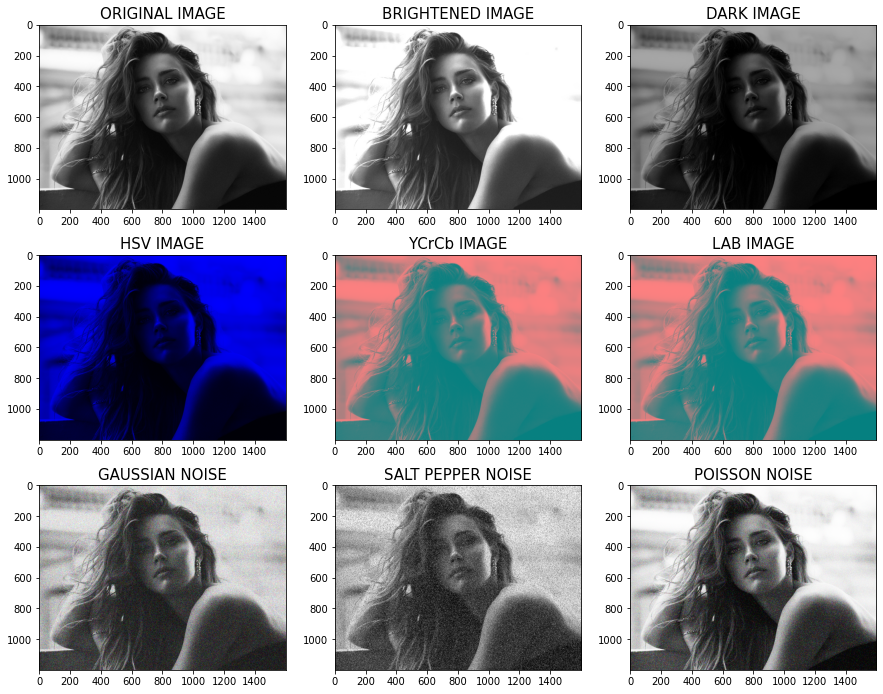

In [4]:
img = cv2.imread('images/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(15,12))

ax = fig.add_subplot(3,3,1)
ax.set_title('ORIGINAL IMAGE', fontsize=15)
ax.imshow(img)

img_new = brightness_contrast(img, alpha = 1.3, beta = 20)
ax = fig.add_subplot(3,3,2)
ax.set_title('BRIGHTENED IMAGE', fontsize=15)
ax.imshow(img_new)
             
img_new = brightness_contrast(img, alpha = 0.7, beta = -10)
ax = fig.add_subplot(3,3,3)
ax.set_title('DARK IMAGE', fontsize=15)
ax.imshow(img_new)

img_new = colorSpace(img, colorspace = 'hsv')
ax = fig.add_subplot(3,3,4)
ax.set_title('HSV IMAGE', fontsize=15)
ax.imshow(img_new)
             
img_new = colorSpace(img, colorspace = 'ycrcb')
ax = fig.add_subplot(3,3,5)
ax.set_title('YCrCb IMAGE', fontsize=15)
ax.imshow(img_new)
             
img_new = colorSpace(img, colorspace = 'lab')
ax = fig.add_subplot(3,3,6)
ax.set_title('LAB IMAGE', fontsize=15)
ax.imshow(img_new)

img_new = addNoise(img, 'gaussian', mean = 0, var = 0.08)
ax = fig.add_subplot(3,3,7)
ax.set_title('GAUSSIAN NOISE', fontsize=15)
ax.imshow(img_new)

img_new = addNoise(img, 'salt_pepper', sp_ratio = 0.5, noise_amount = 0.1)
ax = fig.add_subplot(3,3,8)
ax.set_title('SALT PEPPER NOISE', fontsize=15)
ax.imshow(img_new)

img_new = addNoise(img, 'poisson', noise_amount = 0.5)
ax = fig.add_subplot(3,3,9)
ax.set_title('POISSON NOISE', fontsize=15)
ax.imshow(img_new)

#### Kernel-based Augmentation examples ####

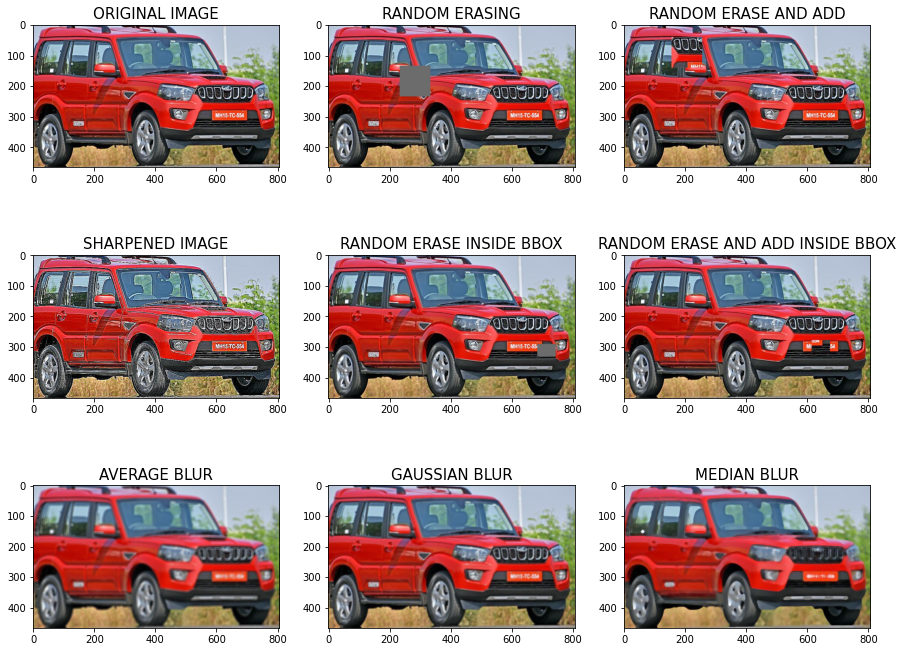

In [5]:
img = cv2.imread('images/0.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(15,12))
bbox = [581, 274, 699, 321]

ax = fig.add_subplot(3,3,1)
ax.set_title('ORIGINAL IMAGE', fontsize=15)
ax.imshow(img)

img_new = randomErase(img, size = (100, 100))
ax = fig.add_subplot(3,3,2)
ax.set_title('RANDOM ERASING', fontsize=15)
ax.imshow(img_new)
             
img_new = randomCropAdd(img, size = (100, 100))
ax = fig.add_subplot(3,3,3)
ax.set_title('RANDOM ERASE AND ADD', fontsize=15)
ax.imshow(img_new)

img_new = sharpen(img)
ax = fig.add_subplot(3,3,4)
ax.set_title('SHARPENED IMAGE', fontsize=15)
ax.imshow(img_new)

img_new = randomErase(img, size = (60, 40), box = bbox)
ax = fig.add_subplot(3,3,5)
ax.set_title('RANDOM ERASE INSIDE BBOX', fontsize=15)
ax.imshow(img_new)
             
img_new = randomCropAdd(img, size = (60, 40), box = bbox)
ax = fig.add_subplot(3,3,6)
ax.set_title('RANDOM ERASE AND ADD INSIDE BBOX', fontsize=15)
ax.imshow(img_new)

img_new = blur(img, 'avg', ksize = (9,9))
ax = fig.add_subplot(3,3,7)
ax.set_title('AVERAGE BLUR', fontsize=15)
ax.imshow(img_new)

img_new = blur(img, 'gaussian', ksize = (9,9), gaussian_sigma = 0)
ax = fig.add_subplot(3,3,8)
ax.set_title('GAUSSIAN BLUR', fontsize=15)
ax.imshow(img_new)

img_new = blur(img, 'median', median_ksize = 11)
ax = fig.add_subplot(3,3,9)
ax.set_title('MEDIAN BLUR', fontsize=15)
ax.imshow(img_new)